In [83]:
# Initial Imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact

In [84]:
# Reading market data - industrial metals
al_path = Path("Aluminium.csv")
al = pd.read_csv(al_path, parse_dates = True, index_col="Date", infer_datetime_format = True).dropna()
co_path = Path("Copper.csv")
co = pd.read_csv(co_path, parse_dates = True, index_col="Date", infer_datetime_format = True).dropna()
pa_path = Path("Palladium.csv")
pa = pd.read_csv(pa_path, parse_dates = True, index_col="Date", infer_datetime_format = True).dropna()

In [85]:
# Creating individual data frames 
al_data = al[["Close/Last", "Volume"]].dropna()
co_data = co[["Close/Last", "Volume"]].dropna()
pa_data = pa[["Close/Last", "Volume"]].dropna()

In [86]:
# Merging data bases
industrial_metals = pd.concat([al_data, co_data, pa_data] , axis = 1)
col = ('AL_price', 'AL_vol', 'CO_price', 'CO_vol', 'PA_price', 'PA_vol')
industrial_metals.columns = col
industrial_metals.head(5)

,AL_price,AL_vol,CO_price,CO_vol,PA_price,PA_vol
Date,,,,,,
2016-07-05,1685.75,5.0,2.1835,107837.0,602.65,6697.0
2016-07-06,NaN,NaN,2.1535,69044.0,607.55,4213.0
2016-07-07,NaN,NaN,2.1235,52331.0,612.35,3570.0
2016-07-08,1699.00,9.0,2.1190,43312.0,617.10,4464.0
2016-07-11,1689.00,14.0,2.1475,50976.0,625.75,4000.0


In [87]:
# Creating data separate data frames
industrial_metals_price = industrial_metals[["AL_price", "CO_price", "PA_price"]]
industrial_metals_vol = industrial_metals[["AL_vol", "CO_vol", "PA_vol"]]

In [160]:
# Reading and creating data frame for vaccine data
vaccine_path = Path("vaccine_2.csv")
vaccine = pd.read_csv(vaccine_path)
vaccine.head()

,Entity,Month,Total
0,Afghanistan,6.0,0.44
1,Africa,6.0,0.91
2,Albania,6.0,11.92
3,Andorra,6.0,25.42
4,Angola,6.0,1.47


In [92]:
# Reading GDP data
gdp_per_capita_path = Path("GDP_per_capita.csv")
gdp_per_capita_original = pd.read_csv(gdp_per_capita_path, index_col = 'Country Code')
gdp_per_capita_original.head(2)
gdp_per_capita = (gdp_per_capita_original[["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]]).dropna()
gdp_per_capita.head(3)

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Code,,,,,,,,,,
AFE,1682.287263,1667.992618,1648.867514,1654.314865,1503.859334,1401.281053,1536.206783,1530.161917,1481.425292,1326.663658
AFG,591.162798,641.871438,637.165464,613.856505,578.466353,509.220101,519.888913,493.756581,507.103392,508.808409
AFW,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332,1695.959215,1772.339155,1714.426800


In [94]:
# Graph Analysis
industrial_metals_vol.head(4)

,AL_vol,CO_vol,PA_vol
Date,,,
2016-07-05,5.0,107837.0,6697.0
2016-07-06,NaN,69044.0,4213.0
2016-07-07,NaN,52331.0,3570.0
2016-07-08,9.0,43312.0,4464.0


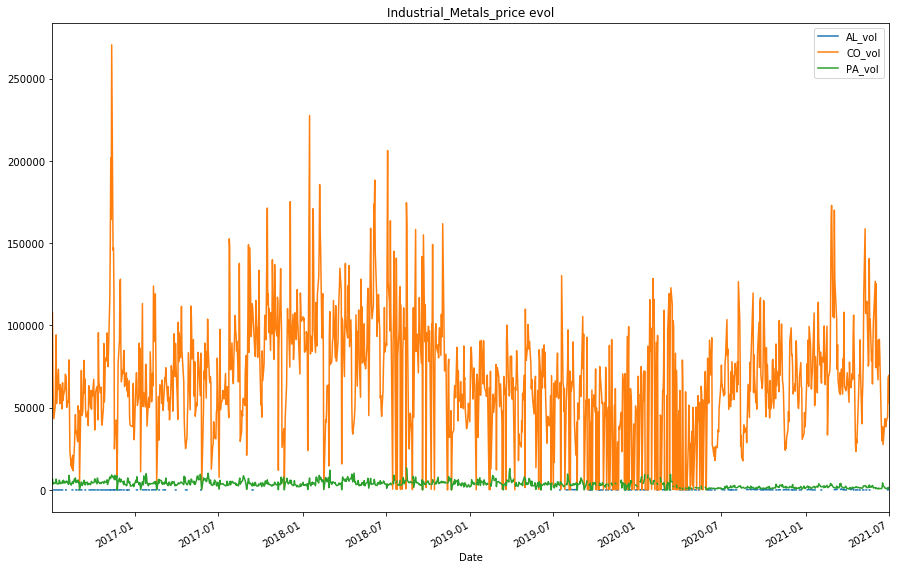

In [95]:
industrial_metals_vol.plot(title = "Industrial_Metals_price evol", figsize = (15,10))

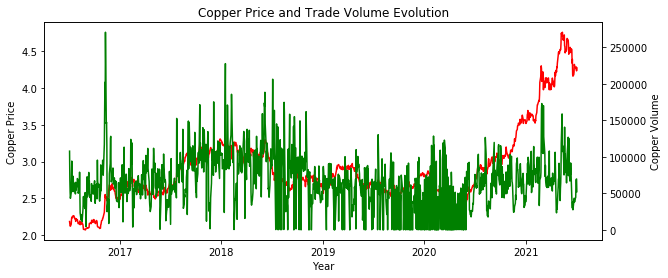

In [144]:
## Market Analysis - Copper 

fig,ax = plt.subplots(figsize=(10,4))
ax.plot(co_data.index,co_data["Close/Last"], color="red")
ax.set_xlabel("Year")
ax.set_ylabel("Copper Price")
ax.set_title("Copper Price and Trade Volume Evolution")
ax2 = ax.twinx()
ax2.plot(co_data.index, co_data["Volume"],color="green")
ax2.set_ylabel("Copper Volume")
plt.show()

In [181]:
# GDP trend main Copper producers in the world - Chile, China, Peru, US 
co_exporters = gdp_per_capita.loc[['CHN', 'CHL', 'PER', 'WLD']]
co_exporters.head()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Code,,,,,,,,,,
CHN,5618.132267,6316.918318,7050.646271,7678.599486,8066.942635,8147.937705,8879.438667,9976.677137,10216.630330,10500.39562
CHL,14637.233440,15351.540740,15842.936480,14670.988910,13574.169240,13753.592150,14998.817060,15888.144360,14741.714400,13231.70421
PER,5869.323882,6528.971775,6756.752996,6672.877373,6229.100674,6204.996457,6710.507602,6957.793411,7027.612207,6126.87454
WLD,10493.169850,10606.357620,10783.681240,10951.690610,10251.020480,10294.189710,10834.344340,11372.727330,11417.174060,10925.74607


In [182]:
co_exporters = co_exporters.T

In [183]:
co_exporters

Country Code,CHN,CHL,PER,WLD
2011,5618.132267,14637.23344,5869.323882,10493.16985
2012,6316.918318,15351.54074,6528.971775,10606.35762
2013,7050.646271,15842.93648,6756.752996,10783.68124
2014,7678.599486,14670.98891,6672.877373,10951.69061
2015,8066.942635,13574.16924,6229.100674,10251.02048
2016,8147.937705,13753.59215,6204.996457,10294.18971
2017,8879.438667,14998.81706,6710.507602,10834.34434
2018,9976.677137,15888.14436,6957.793411,11372.72733
2019,10216.630330,14741.71440,7027.612207,11417.17406
2020,10500.395620,13231.70421,6126.874540,10925.74607


In [184]:
co_exporters.shape
co_exporters.head()

Country Code,CHN,CHL,PER,WLD
2011,5618.132267,14637.23344,5869.323882,10493.16985
2012,6316.918318,15351.54074,6528.971775,10606.35762
2013,7050.646271,15842.93648,6756.752996,10783.68124
2014,7678.599486,14670.98891,6672.877373,10951.69061
2015,8066.942635,13574.16924,6229.100674,10251.02048


In [185]:
plot_co_exporters = co_exporters.hvplot.line(title = "Copper Exporting Countries - GDP per Capita")
plot_co_exporters

:NdOverlay   [Country Code]
   :Curve   [index]   (value)

In [161]:
# Covid vaccination on Copper producing countries

vaccine_df_2 = vaccine.set_index(['Entity']).drop(columns=['Month'])
vaccine_co = vaccine_df_2.loc[['China', 'Chile', 'Peru']]
vaccine_co.head(20)

,Total
Entity,
China,15.51
Chile,48.26
Peru,6.56


In [163]:
plot_vaccine_co = vaccine_co.hvplot.bar(
    xlabel = "Country", 
    ylabel = "% Fully Vaccinated People", 
    title = "Copper Producing Countries Vaccine Evolution",
    rot = 90, height =500)
plot_vaccine_co

:Bars   [Entity]   (Total)

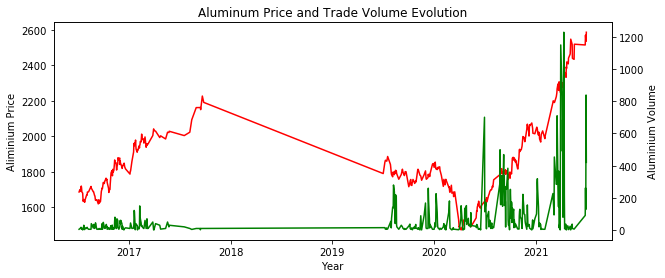

In [165]:
## Market Analysis - Aluminium

fig,ax = plt.subplots(figsize=(10,4))
ax.plot(al_data.index,al_data["Close/Last"], color="red")
ax.set_xlabel("Year")
ax.set_ylabel("Aliminium Price")
ax.set_title("Aluminum Price and Trade Volume Evolution")
ax2 = ax.twinx()
ax2.plot(al_data.index, al_data["Volume"],color="green")
ax2.set_ylabel("Aluminium Volume")
plt.show()

In [193]:
# GDP trend main Aluminium producers in the world - Chile, China, Peru, US 
al_exporters = gdp_per_capita.loc[['CHN', 'IND', 'RUS', 'WLD']]
al_exporters.head()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Code,,,,,,,,,,
CHN,5618.132267,6316.918318,7050.646271,7678.599486,8066.942635,8147.937705,8879.438667,9976.677137,10216.630330,10500.39562
IND,1458.104066,1443.882435,1449.610451,1573.885642,1605.605445,1732.554242,1980.667020,1996.915087,2100.751461,1900.70681
RUS,14311.084320,15420.874540,15974.644630,14095.648740,9313.013625,8704.898413,10720.332660,11287.355280,11497.649250,10126.72179
WLD,10493.169850,10606.357620,10783.681240,10951.690610,10251.020480,10294.189710,10834.344340,11372.727330,11417.174060,10925.74607


In [194]:
al_exporters = al_exporters.T
al_exporters

Country Code,CHN,IND,RUS,WLD
2011,5618.132267,1458.104066,14311.084320,10493.16985
2012,6316.918318,1443.882435,15420.874540,10606.35762
2013,7050.646271,1449.610451,15974.644630,10783.68124
2014,7678.599486,1573.885642,14095.648740,10951.69061
2015,8066.942635,1605.605445,9313.013625,10251.02048
2016,8147.937705,1732.554242,8704.898413,10294.18971
2017,8879.438667,1980.667020,10720.332660,10834.34434
2018,9976.677137,1996.915087,11287.355280,11372.72733
2019,10216.630330,2100.751461,11497.649250,11417.17406
2020,10500.395620,1900.706810,10126.721790,10925.74607


In [195]:
al_exporters.shape
al_exporters.head()

Country Code,CHN,IND,RUS,WLD
2011,5618.132267,1458.104066,14311.084320,10493.16985
2012,6316.918318,1443.882435,15420.874540,10606.35762
2013,7050.646271,1449.610451,15974.644630,10783.68124
2014,7678.599486,1573.885642,14095.648740,10951.69061
2015,8066.942635,1605.605445,9313.013625,10251.02048


In [196]:
plot_al_exporters = al_exporters.hvplot.line(title = "Aluminium Exporting Countries - GDP per Capita")
plot_al_exporters

:NdOverlay   [Country Code]
   :Curve   [index]   (value)

In [198]:
# Covid vaccination on Aluminium producing countries

vaccine_df_2 = vaccine.set_index(['Entity']).drop(columns=['Month'])
vaccine_al = vaccine_df_2.loc[['China', 'Russia', 'India']]
vaccine_al.head()

,Total
Entity,
China,15.51
Russia,10.10
India,3.54


In [202]:
plot_vaccine_al = vaccine_al.hvplot.bar(
    xlabel = "Country", 
    ylabel = "% Fully Vaccinated People", 
    title = "Aluminium Producing Countries Vaccine Evolution",
    rot = 90, height =500)
plot_vaccine_al

:Bars   [Entity]   (Total)

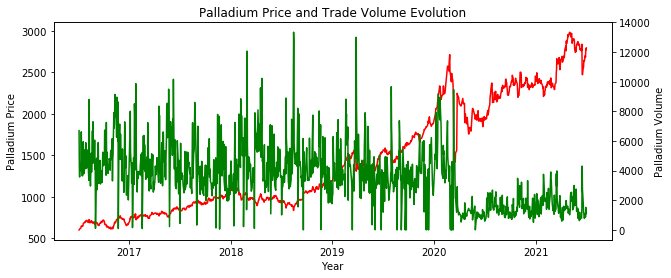

In [204]:
## Market Analysis - Palladium

fig,ax = plt.subplots(figsize=(10,4))
ax.plot(pa_data.index,pa_data["Close/Last"], color="red")
ax.set_xlabel("Year")
ax.set_ylabel("Palladium Price")
ax.set_title("Palladium Price and Trade Volume Evolution")
ax2 = ax.twinx()
ax2.plot(pa_data.index, pa_data["Volume"],color="green")
ax2.set_ylabel("Palladium Volume")
plt.show()

In [206]:
# GDP trend main Palladium producers in the world 
pa_exporters = gdp_per_capita.loc[['USA', 'ZAF', 'RUS', 'CAN', 'WLD']]
pa_exporters.head()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Code,,,,,,,,,,
USA,49882.558130,51602.931050,53106.536770,55049.988330,56863.371500,58021.400500,60109.65573,63064.418410,65279.529030,63543.577790
ZAF,8007.476439,7501.661096,6832.725546,6433.400402,5734.633422,5272.543648,6131.47945,6372.605655,6001.401121,5090.715025
RUS,14311.084320,15420.874540,15974.644630,14095.648740,9313.013625,8704.898413,10720.33266,11287.355280,11497.649250,10126.721790
CAN,52223.696110,52669.089960,52635.174960,50955.998320,43596.135540,42315.603710,45129.35644,46453.901870,46326.672640,43241.617830
WLD,10493.169850,10606.357620,10783.681240,10951.690610,10251.020480,10294.189710,10834.34434,11372.727330,11417.174060,10925.746070


In [207]:
pa_exporters = pa_exporters.T
pa_exporters

Country Code,USA,ZAF,RUS,CAN,WLD
2011,49882.55813,8007.476439,14311.084320,52223.69611,10493.16985
2012,51602.93105,7501.661096,15420.874540,52669.08996,10606.35762
2013,53106.53677,6832.725546,15974.644630,52635.17496,10783.68124
2014,55049.98833,6433.400402,14095.648740,50955.99832,10951.69061
2015,56863.37150,5734.633422,9313.013625,43596.13554,10251.02048
2016,58021.40050,5272.543648,8704.898413,42315.60371,10294.18971
2017,60109.65573,6131.479450,10720.332660,45129.35644,10834.34434
2018,63064.41841,6372.605655,11287.355280,46453.90187,11372.72733
2019,65279.52903,6001.401121,11497.649250,46326.67264,11417.17406
2020,63543.57779,5090.715025,10126.721790,43241.61783,10925.74607


In [209]:
plot_pa_exporters = pa_exporters.hvplot.line(title = "Palladium Exporting Countries - GDP per Capita")
plot_pa_exporters

:NdOverlay   [Country Code]
   :Curve   [index]   (value)

In [210]:
# Covid vaccination on Palladium producing countries

vaccine_df_2 = vaccine.set_index(['Entity']).drop(columns=['Month'])
vaccine_pa = vaccine_df_2.loc[['Canada', 'Russia', 'United States', 'South Africa']]
vaccine_pa.head()

,Total
Entity,
Canada,15.71
Russia,10.10
United States,43.55
South Africa,0.81


In [211]:
plot_vaccine_pa = vaccine_pa.hvplot.bar(
    xlabel = "Country", 
    ylabel = "% Fully Vaccinated People", 
    title = "Palladium Producing Countries Vaccine Evolution",
    rot = 90, height =500)
plot_vaccine_pa

:Bars   [Entity]   (Total)